# Multi Layer Perceptron (MLP)
So far, the models built had only 3 neurons. But, what if more neurons were added to the network in the model to make it more complex in order to get the model to learn more complex patterns.

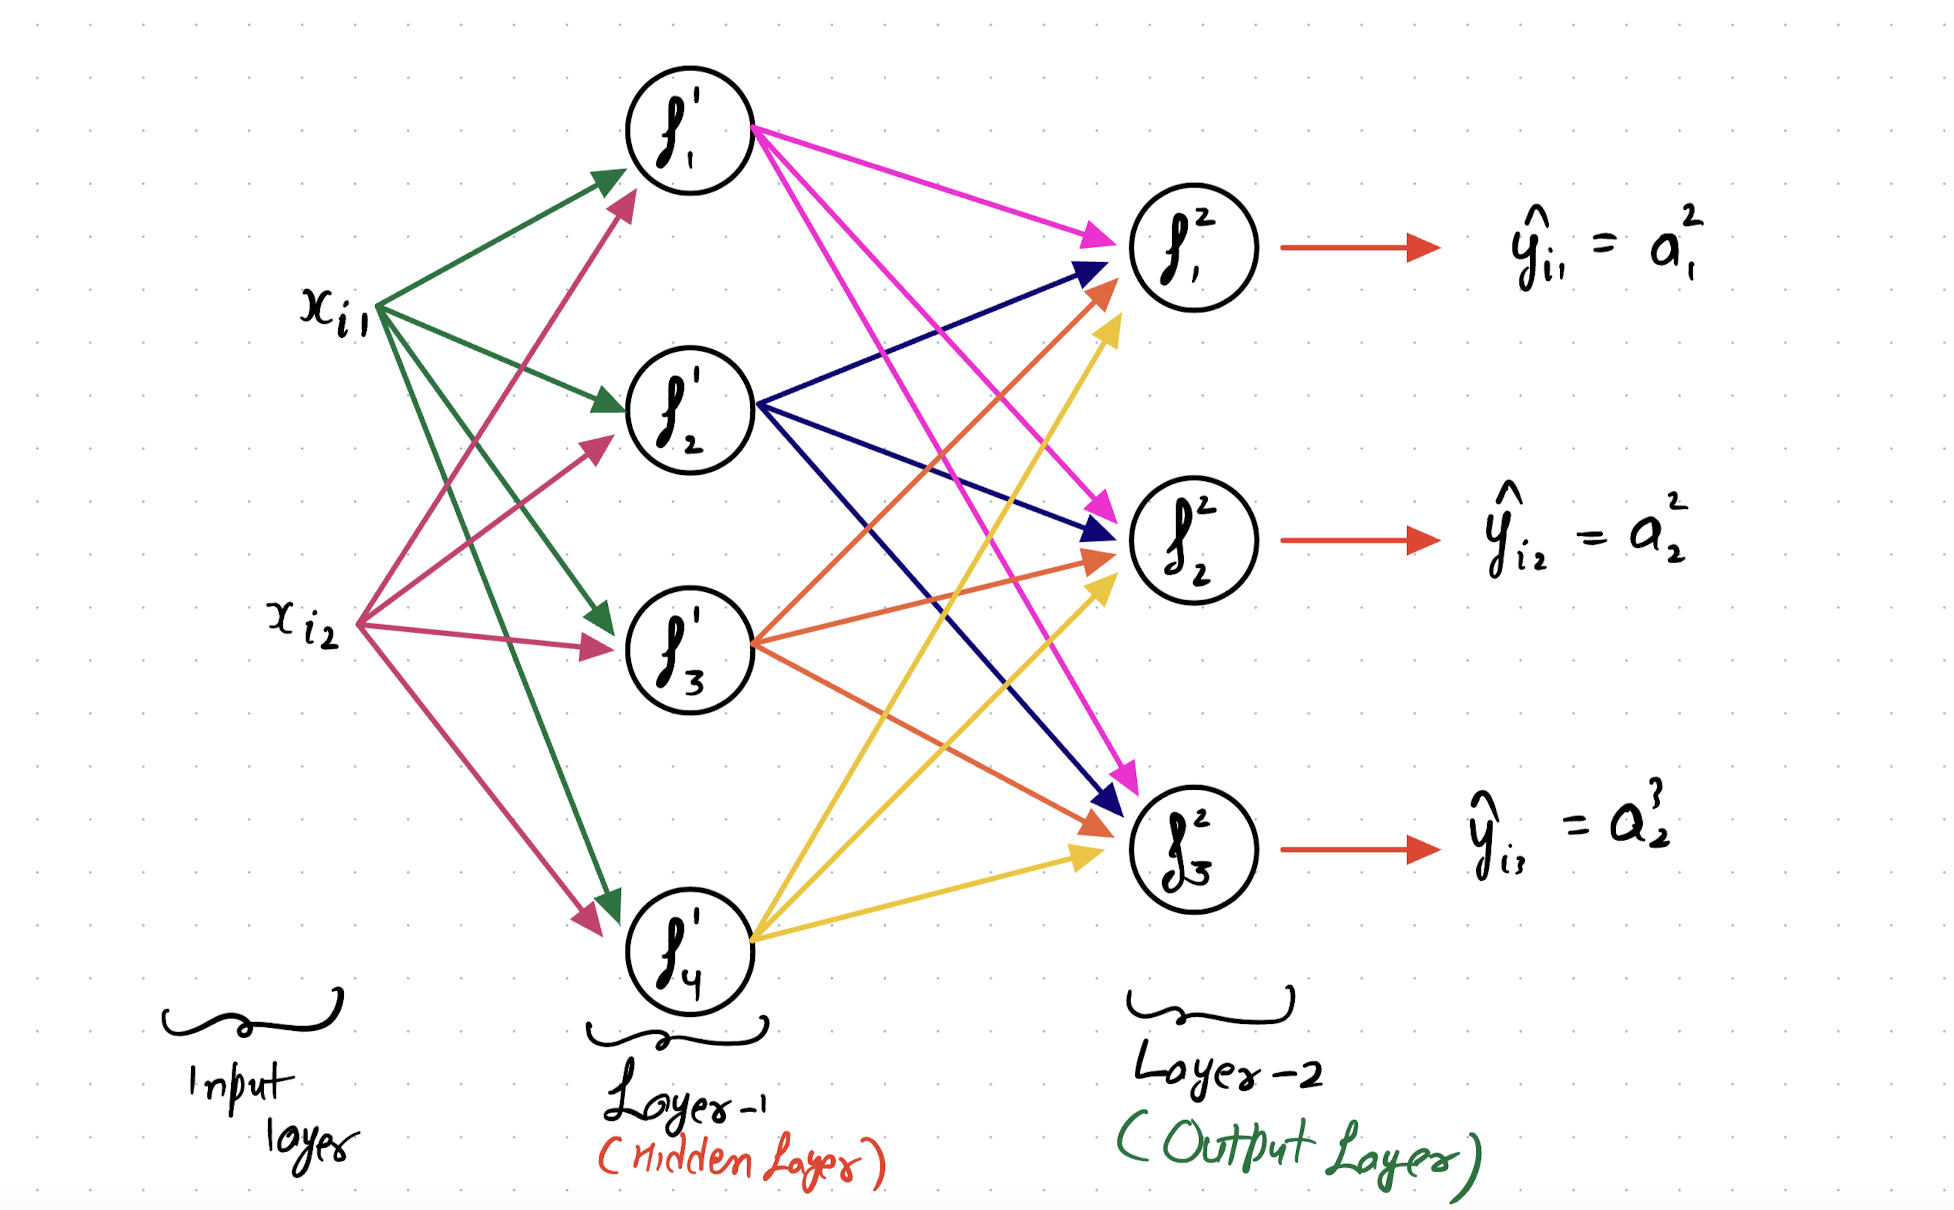

There are 2 features which are passed as inputs and 3 classes which are obtained as output.

In the above figure, superscript notation is used to represent the layer. Therefore, representing with $f_1$, $f_1^1$ is used (i.e., neuron 1 of layer 1).

The inputs (layer 0 or input layer) is connected with 4 neurons of layer 1. These 4 neurons are connected with 3 neurons of the output layers (layer 2).

This intermediate layer in between the input and output is called hidden layer.

### Why is it called hidden layer?
Both input and output are hidden from this layer and this layer is not directly dealt with. Hence, it is called a hidden layer.

The network can be made complex by increasing the number of neurons in the hidden layer or by increasing the number of hidden layers.

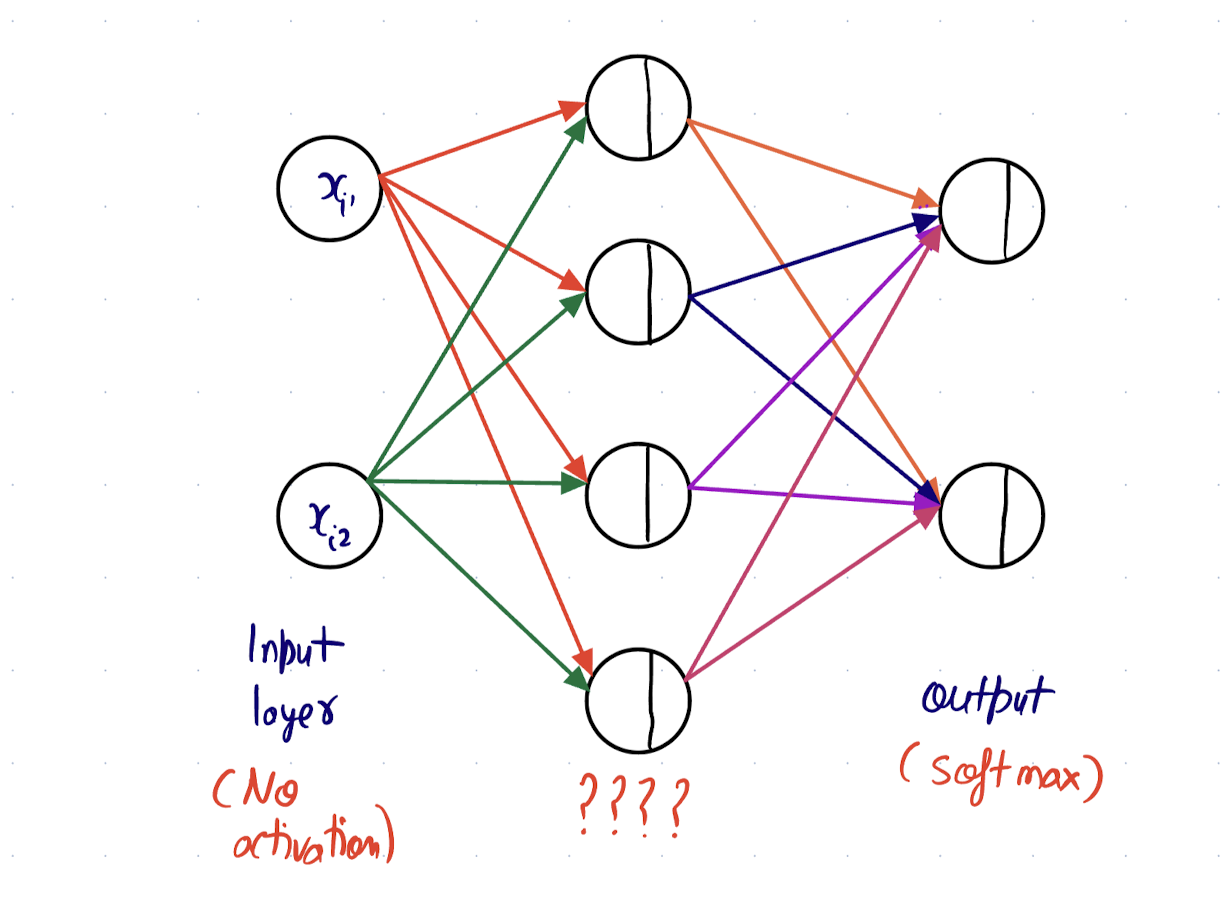

### What will the activation function of the output layer be?
Since this is a multi-class classification problem, the activation function will be softmax.

### What will the activation function of the hidden layer be?
Since the model needs to learn a non-linear decision boundary, the activation functions will also have to be non-linear.

### What happens if each activation function in MLP is linear?
Consider the following example to understand,

Given, $f(x) = 2x + 1$, $g(x) = 3x + 2$, will $f(g(x))$ be linear or non-linear?

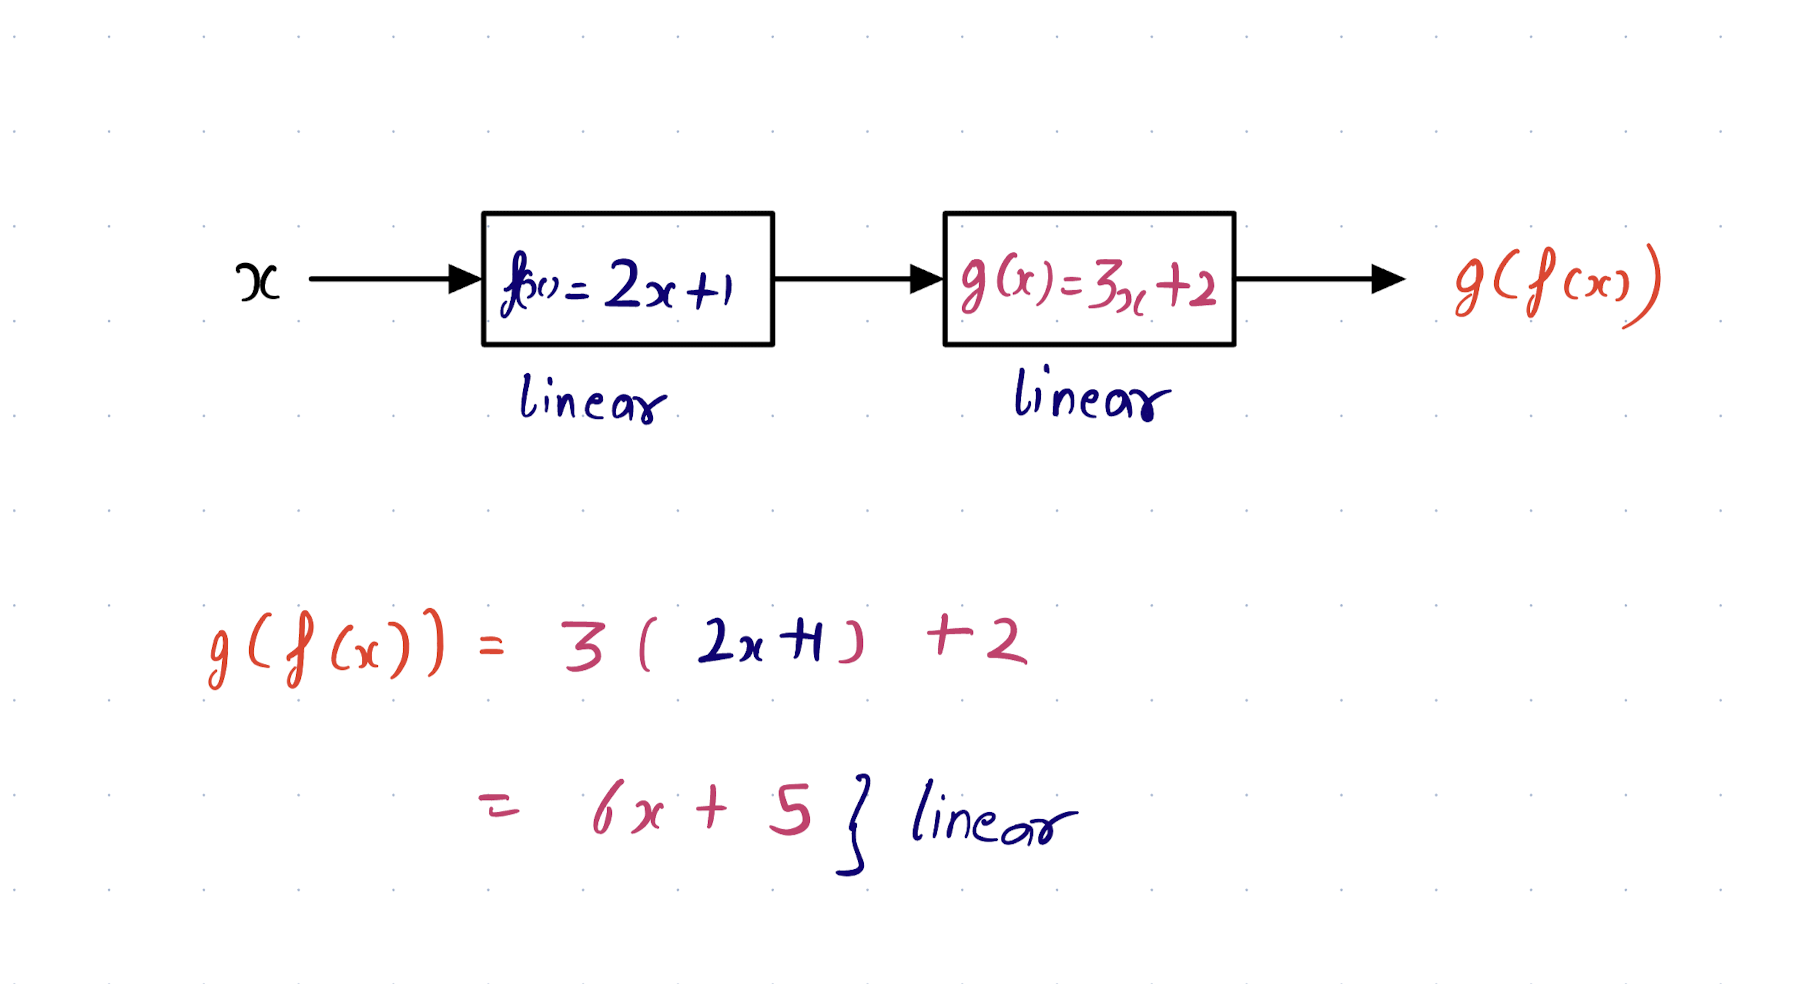

Composition of 2 linear function is linear. If the activation function used is linear, then the model will also be linear. But in this case, a non-linear model is required.

### How can a non-linear activation function help?
Consider, $f(x) = x^2 + 1$, $g(x) = 2x + 1$, will $g(f(x))$ be linear or non-linear?

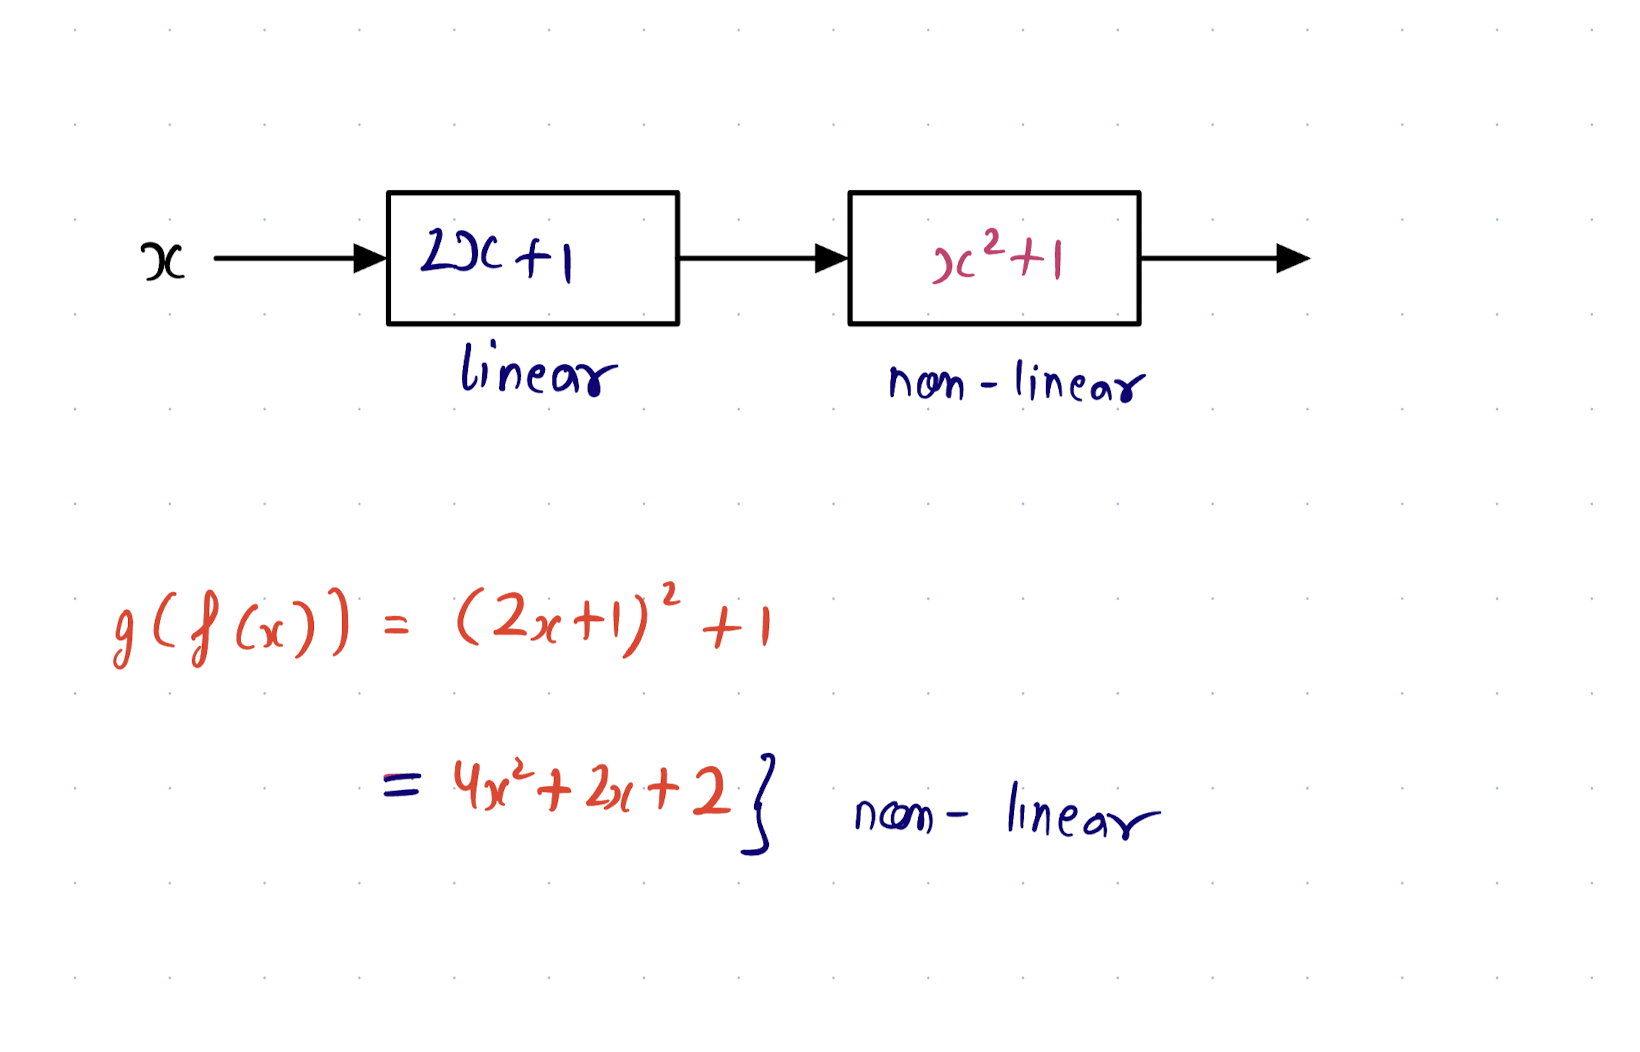

### What if another non-linear function stacked?
Consider, $h(x) = x^2 + 1$, $f(x) = 2x^2 + 1$, and $g(x) = x + 1$,

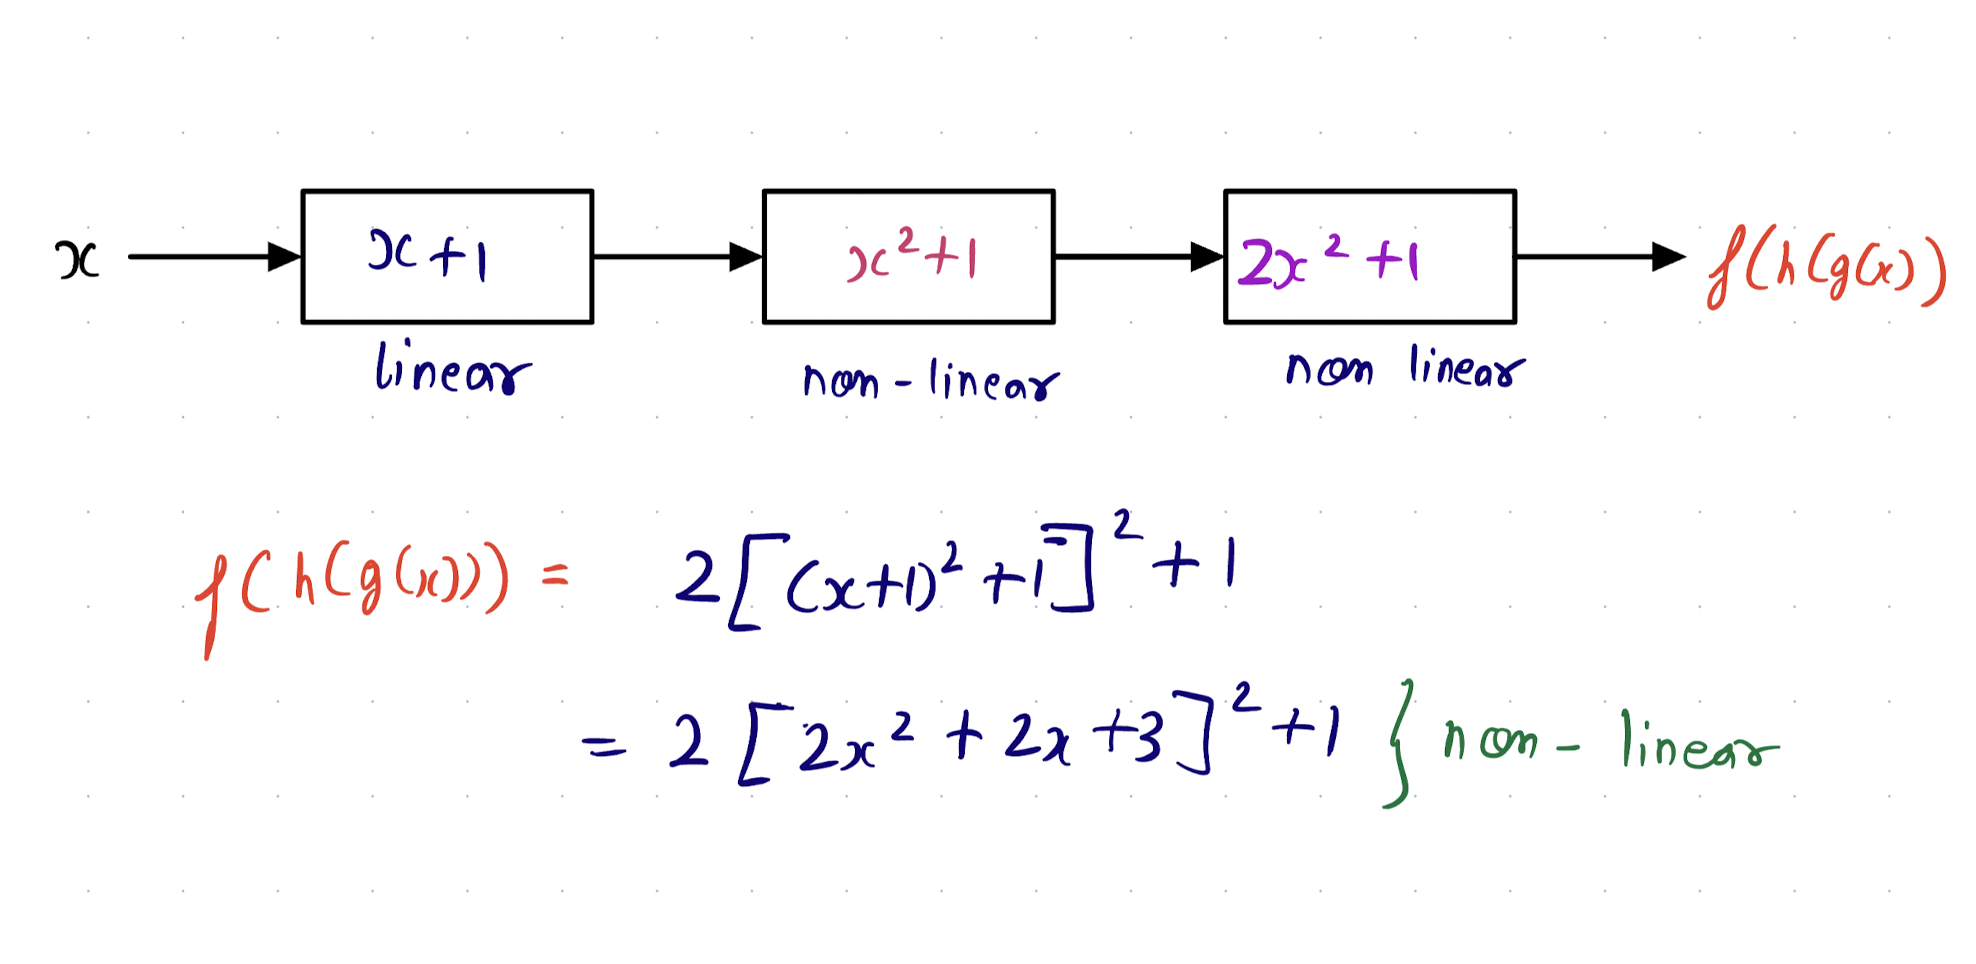

Therefore, stacking a non-linear function over a linear function and repeating the process may create complex features.

Suppose there are 2 inputs $x_1$ and $x_2$, the computation graph will look as follows,

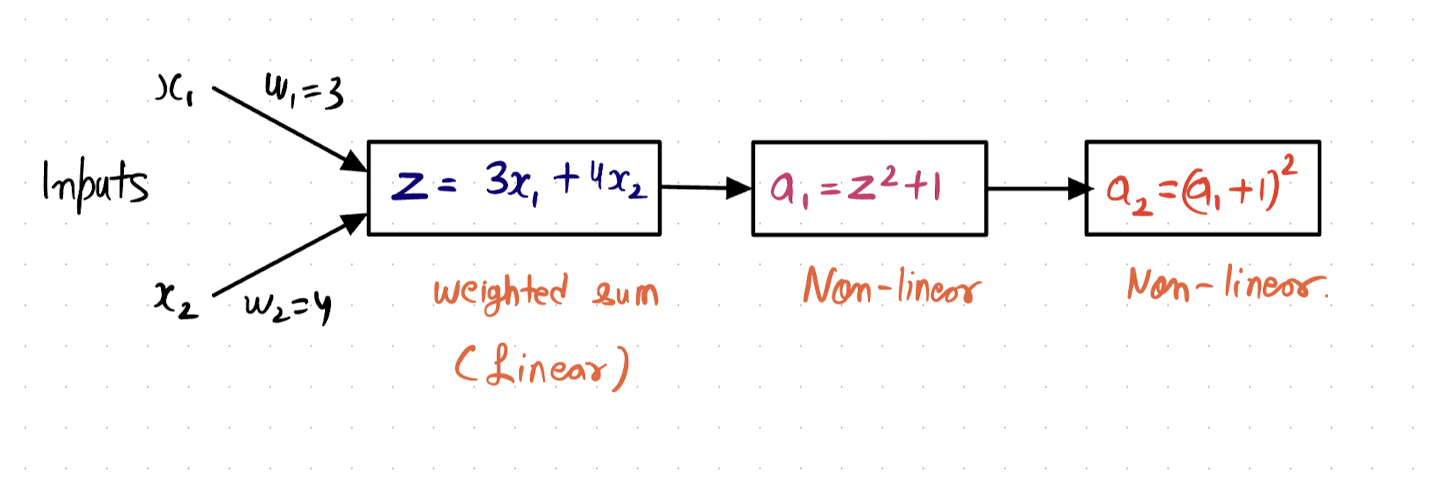

Explanation,
- $z$ is the weighted sum, hence it will be linear, $z = 3x_1 + 4x_2$.
- $a_1$ will be non-linear and complex, $a_1 = 9x_1^2 + 16x_2^2 + 24x_1x_2$.
- $a_2$ will be non-linear and much more complex than $a_1$, $a_2 = (9x_1^2 + 16x_2^2 + 24x_1x_2 +1)^2 = (9x_1^2 + 16x_2^2)^2 + 2(9x_1^2 + 16x_2^2)(24x_1x_2 +1) + (24x_1x_2 +1)^2$

### What non-linear function should be used as the activation function?
Recall that, sigmoid is one of the non-linear activation function.

### Should different activation functions be used in different layers?
Theoritically, it is very much possible to use different activation functions in different layers. But, studies have shown that doing so does not add much value.

# Activation Function
Sigmoid can be used as an activation function for the hidden layer. Note that,
- Domain of sigmoid is, $(-\infty, \infty)$.
- Range of sigmoid is, $(0, 1)$.
- Derivative of sigmoid also lies between $(0, 1)$.

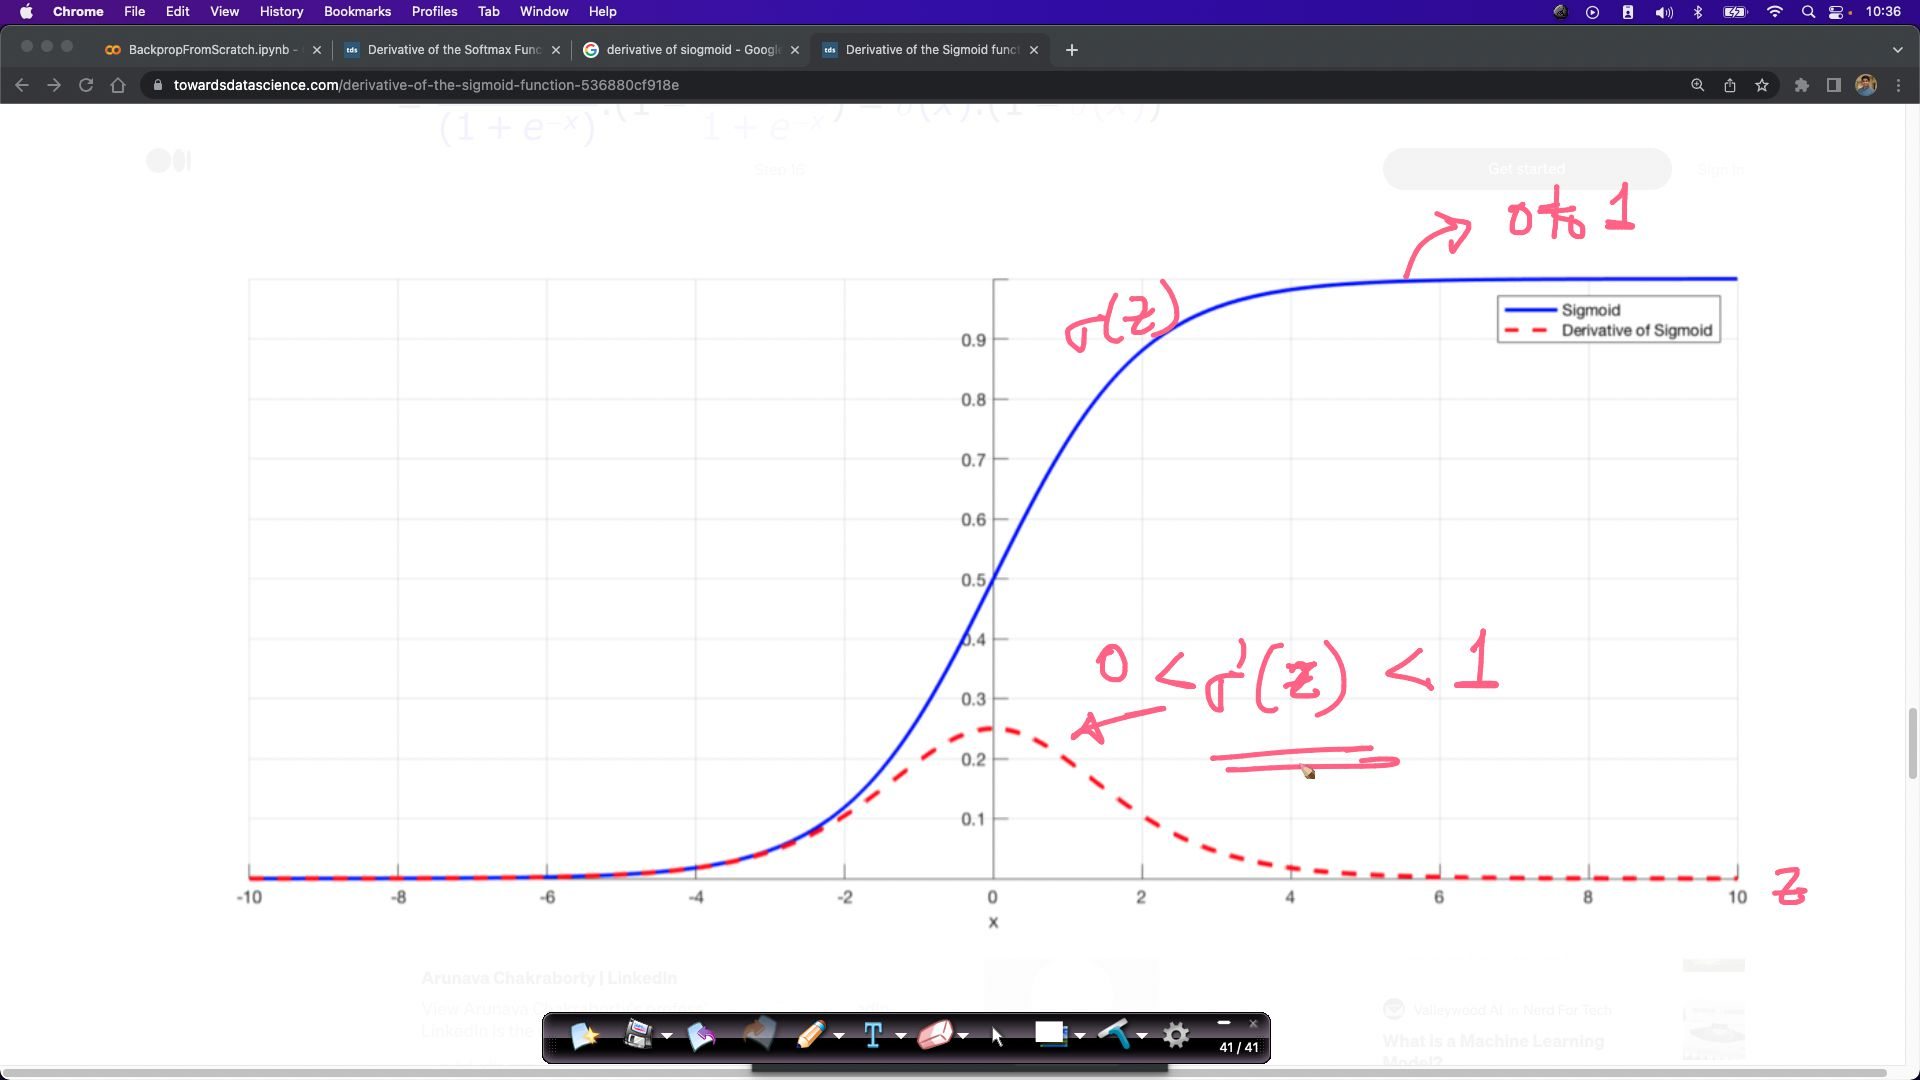

Other activation functions: $\tan{h}$

### $\tan{h}$
- $\tan{h}$ is a shifted version of sigmoid function.
- $\tan{h}$ works better than sigmoid all the time, the mean value is 0.
- Input lies in the range, $(-\infty, \infty)$.
- Output lies in the range $(-1, 1)$.
- $\tan{h}$ is not very used often, unless the output is required to lie in the range of $(-1, 1)$.
- $\tan{h}$ is mathematically represented as, $\tan{h}(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$.
- Derivative of $\tan{h}$ function is, $\frac{d(\tan{h})}{dz} = 1 - \tan{h}^2(z)$.
- The range of this is, $(0, 1)$.

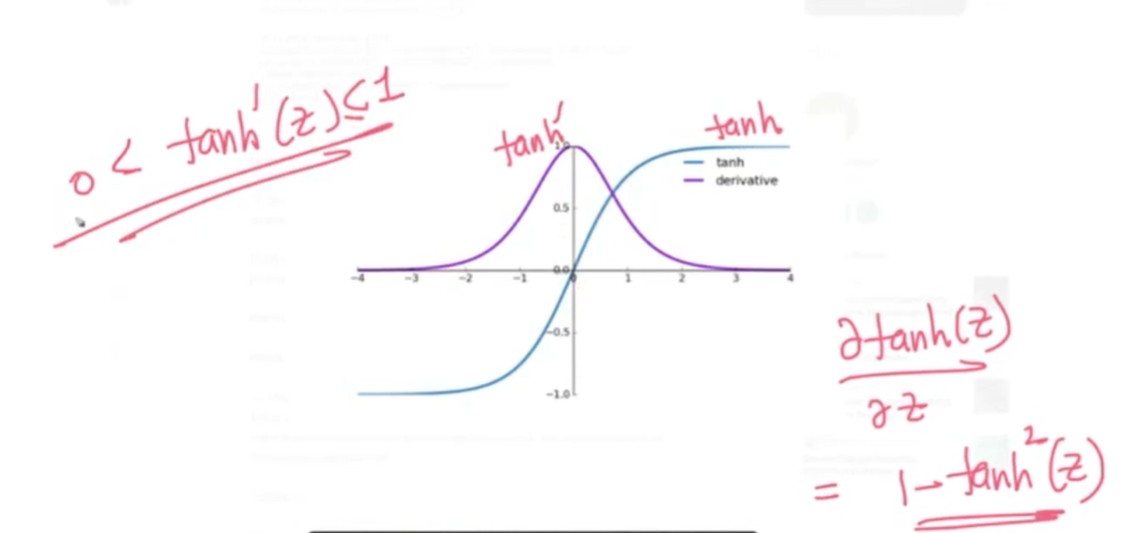

### Issue with sigmoid and $\tan{h}$
- Vanishing gradients:
    - The downside of both sigmoid and $\tan{h}$ is that their gradient is lesser than 1 for most of the values of z.
    - This hampers the gradient descent process and the calculated gradients will be very small.

### Why does small gradient hamper gradient descent process?
The derivative of sigmoid and $\tan{h}$ lies between $(0, 1)$. Therefore, the product of these terms in the range will become very small. In fact, as the number of layers in the NN increase, the product will become smaller and smaller.

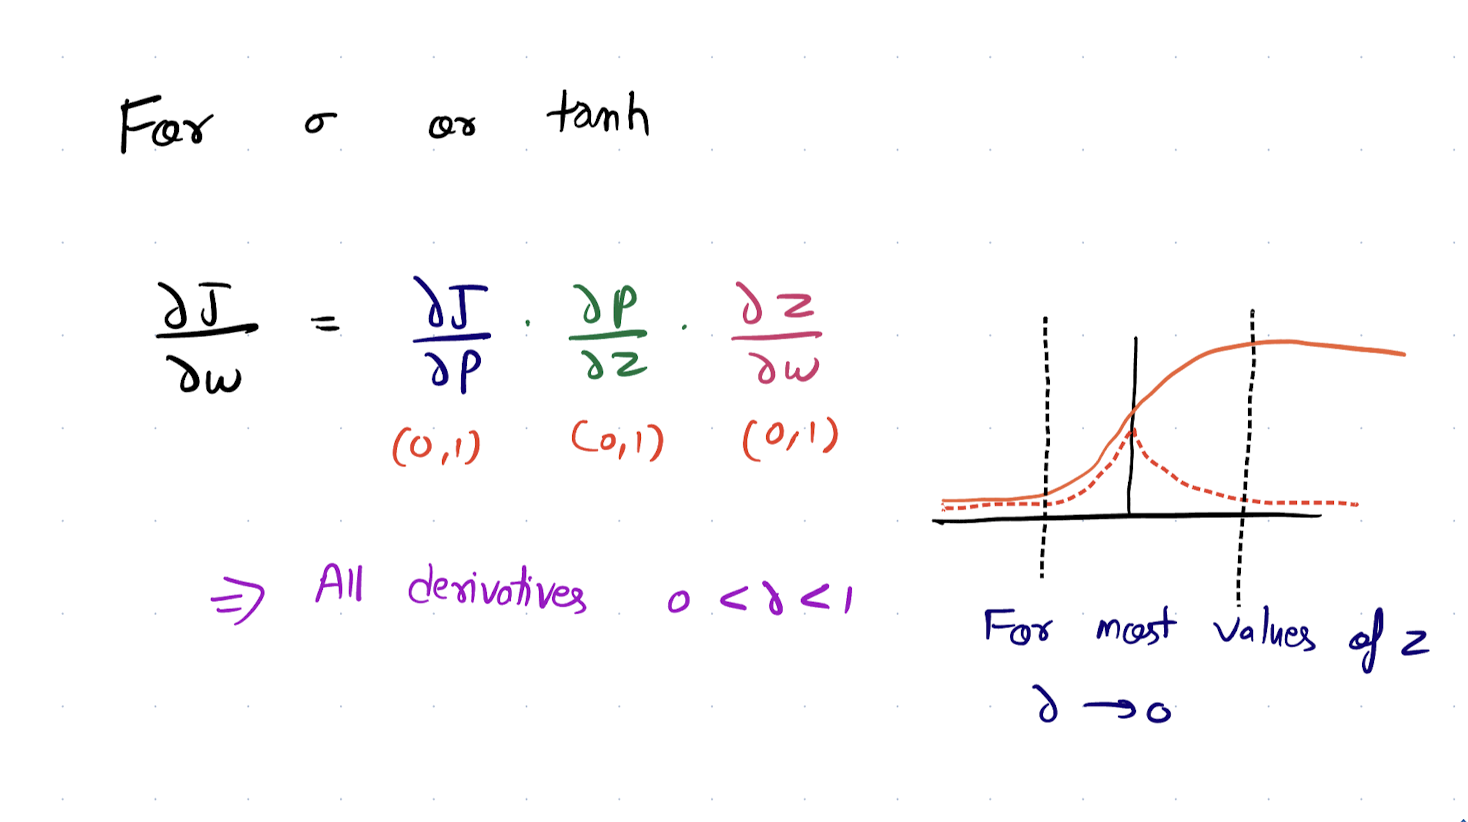

The equation to update the weight $w$ is, $w_{new} = w_{old} - \eta * \frac{\partial loss}{\partial w} \biggr\vert_{{w}_{old}}$.

- The partial derivative value becomes miniscule as the number of layers increase.
- As a result, the Neural Network gets trained very slowly.
- In fact, for close to 2 decades, people could not imagine using a NN with more than 3 to 4 layers.

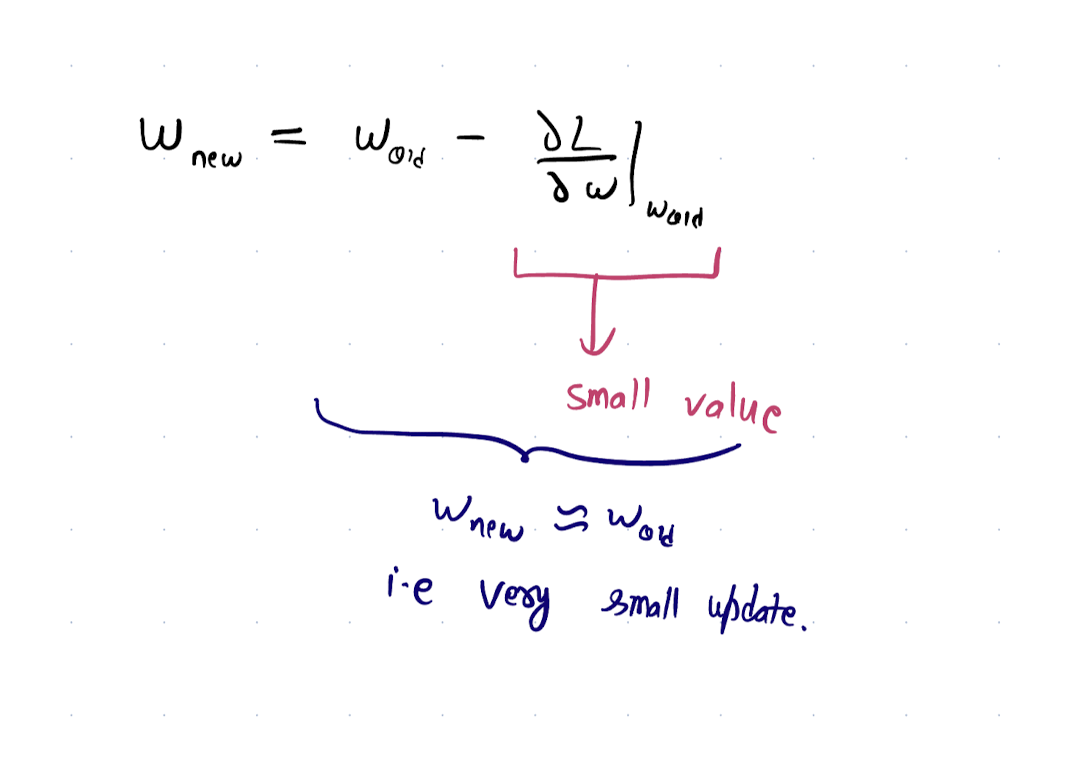

### What should be the properties of an ideal activation function?
- Differentiable.
- Non-linear.
- Easy to calculate.
- Gradient is greater than or equal to 1 for a big range of $z$.

# ReLU
ReLU stands for Rectified Linear Unit. It says that for any positive value, the ReLU function returns that value as it is, i.e., $\text{ReLU}(z) = z$, if $z > 0$. Else, the ReLU function returns a 0, i.e., $\text{ReLU}(z) = 0$, if $z <= 0$.

The ReLU function is defined as, $\text{ReLU}(z) = \max{(0, z)}$. This means that, for any input $z$,
- If $z$ is positive, the output is $z$ itself.
- If $z$ is negative or zero, the output is 0.

### Derivative of ReLU
The derivative of ReLU function is,

$\text{ReLU}'(z) = \left\{\begin{matrix}1, if \ z>0\\0, if \ z<0\end{matrix}\right.$

This means that the derivative is 1 for positive inputs and 0 for negative inputs.

Since it is not continuous, it is not differentiable at 0. Therefore, an approximation is taken for it work. Hence, the derivative of ReLU is, $\text{ReLU}'(z) = \left\{\begin{matrix}1, if \ z > 0\\0, if \ z <= 0\end{matrix}\right.$

### Why is the derivative at 0 is ignored?
While the ReLU function is not strictly differentiable at 0, in practice, the derivative as defined above is often used. This is because,
- Practical implementation: Most deep learning frameworks, like TensorFlow and PyTorch, implement ReLU with this derivative approximation.
- Numerical stability: The gradient at 0 is typically a small and ignoring it does not significantly impact the training process.
- Sparsity: The ReLU function can introduce sparsity in the network, which can help in training and regularization.

### Advantage of ReLU
- Efficient computation: ReLU is computationally efficient compared to other activation functions like sigmoid and $\tan{h}$.
- Reduced vanishing gradient problem: The ReLU function can help mitigate the vanishing gradient problem, especially in deeper networks.
- Sparsity: It can introduce sparsity in the network, which can lead to faster training and better generalization.

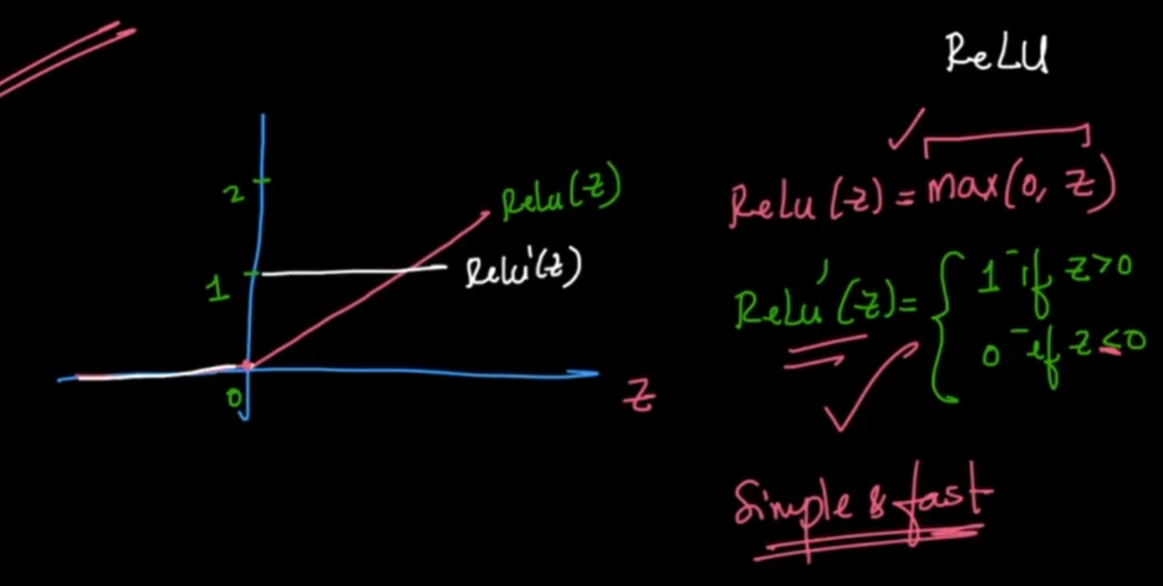

### Is there a problem with practically using ReLU as the activation function?
Yes. Even though it is the most widely used activation function in Deep Learning, there is a problem with ReLU,
- If one derivative term in calculation of $\frac{\partial Loss}{\partial w}$ gets the value 0, the entire term will become 0.
- As a result, there is no update in the value of weight.
- This is known as "dying ReLU".
- Therefore, there is a potential vanishing gradient problem.

While ReLU is a widely used activation function in deep learning, it has a potential drawback known as the "dying ReLU" problem. If a ReLU neuron consistently receives negative inputs, its output will always be zero, and its gradient during backpropagation will also be zero. This can lead to a vanishing gradient problem, where the network fails to learn effectively.

To mitigate this issue, various activation functions have been introduced, such as Leaky ReLU, Parametric ReLU, Exponential Linear Unit (ELU), and Scaled Exponential Linear Unit (SELU). These functions introduce non-linearity and help alleviate the vanishing gradient problem, enabling the training of deeper neural networks.

# Leaky ReLU
This is very similar to ReLU. In case of negative values, a small gradient ($\alpha$) associated with it is added instead of havinf 0.

Therefore,
$\text{Leaky ReLU}'(z) = \left\{\begin{matrix}1, if \ z>0\\α, if \ z<=0\end{matrix}\right.$

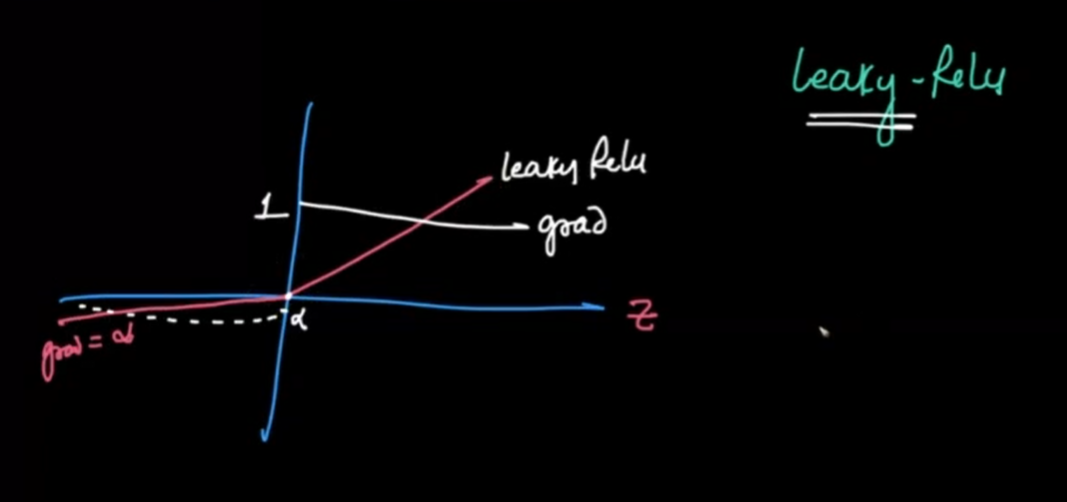

# Notations For N Layer NN
As the number of layers increase, the earlier weight notation will not work. Therefore, layer number is added to weight notation as well.

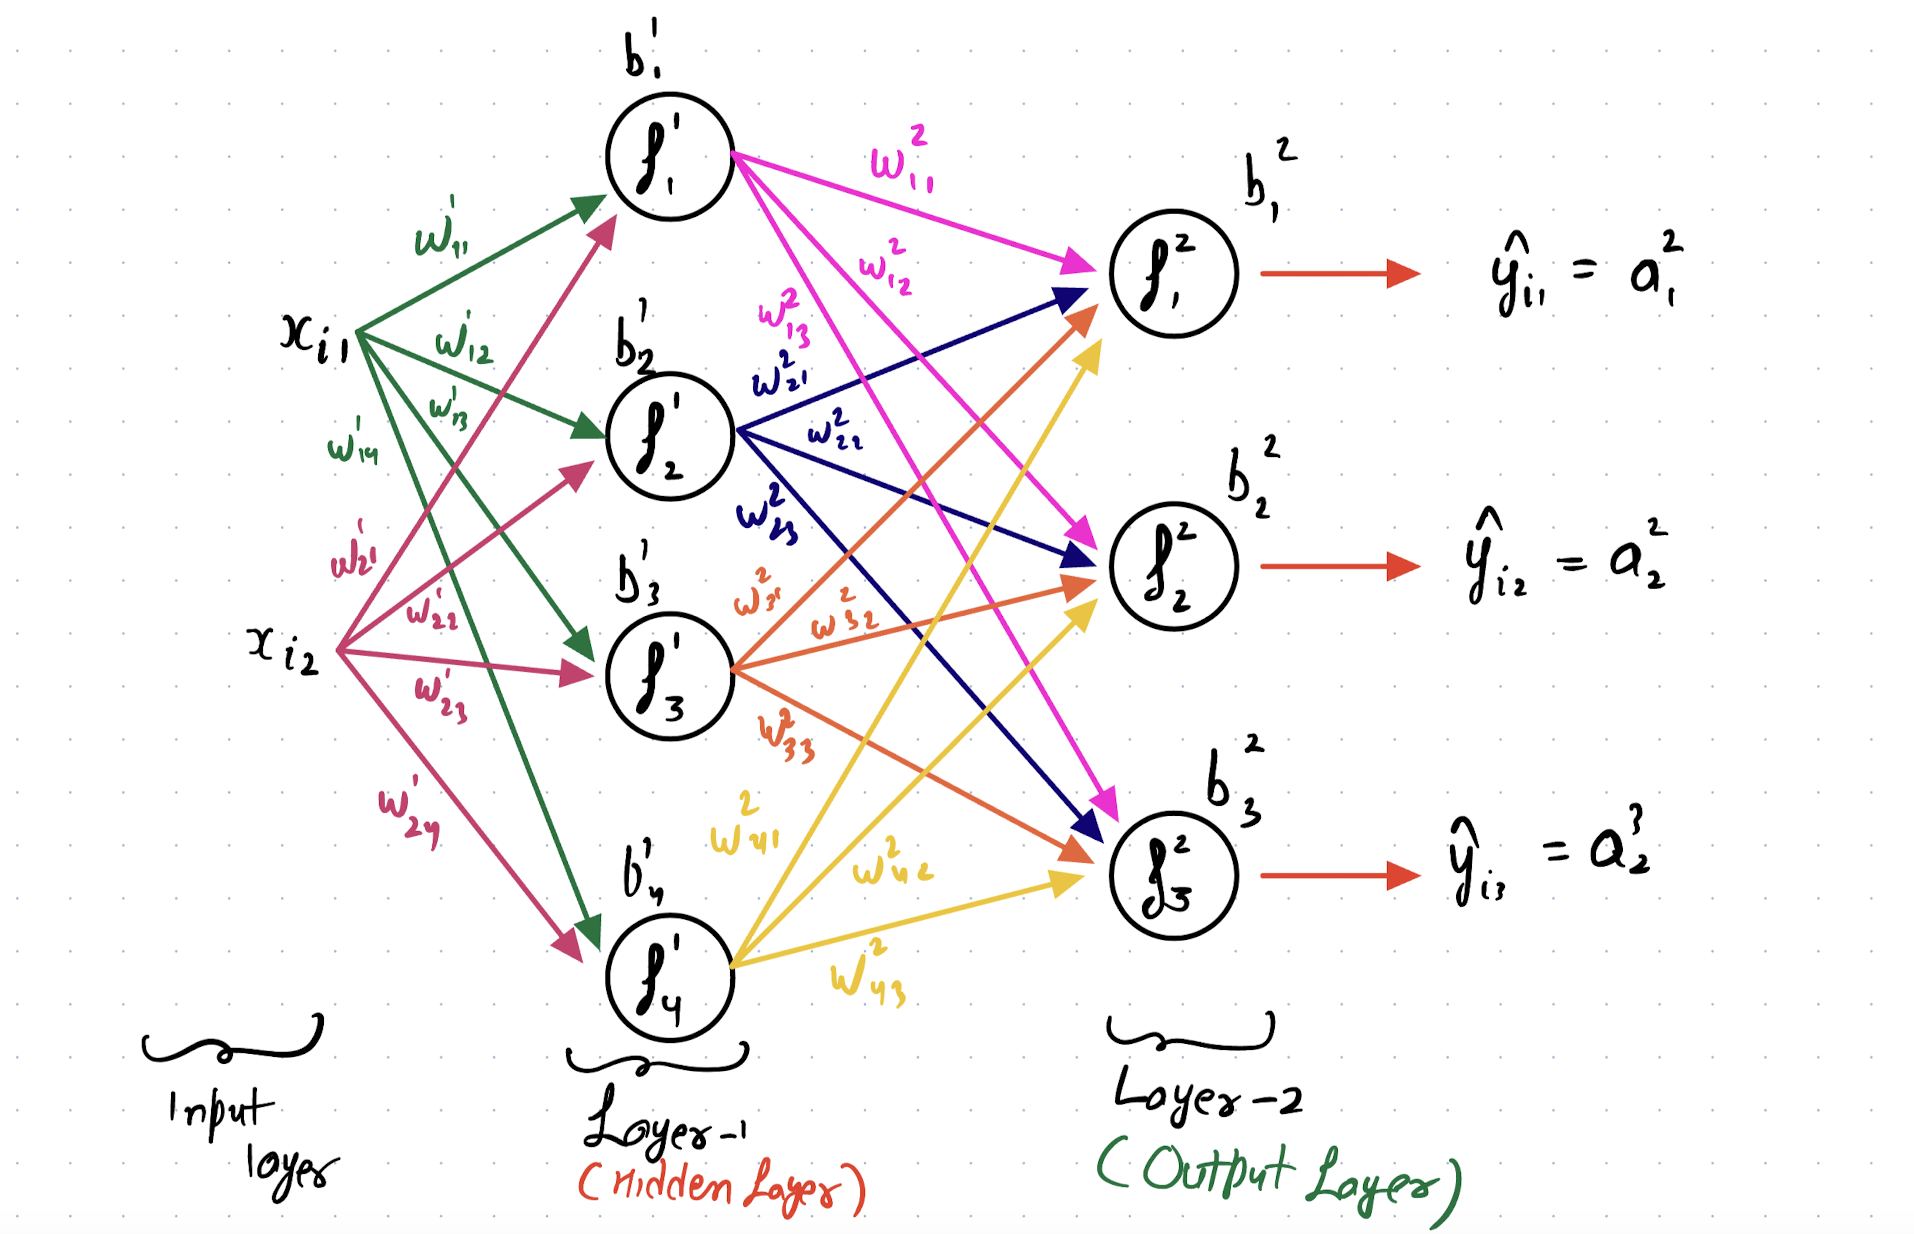

For weight, $w_{ij}^L$, where,
- $L$ represents the layer number.
- $i$ represents the from Neuron.
- $j$ represents the to Neuron.

For bias, $b_i^L$, where,
- $L$ represents the layer number.
- $i$ represents the Neuron.

There are 2 sets of weights and biases for the first and second layers, $w^1$, $w^2$, $b^1$, $b^2$.

### Dimensions of $w^1$, $w^2$, $b^1$, $b^2$
- $w^1$:
    - There are 2 inputs that are fed to 4 Neurons.
    - Each pair of input and Neuron has a unique weight value.
    - Therefore, $w^1$ will be a `2x4` matrix, $w^1 = \begin{bmatrix}w_{11}^1 & w_{12}^1 & w_{13}^1 & w_{14}^1\\w_{21}^1 & w_{22}^1 & w_{23}^1 & w_{24}^1\end{bmatrix}_{2 \times 4}$.
- $b^1$:
    - There are 4 Neurons in the first layer.
    - Each of which has a unique bias value.
    - Therefore, $b^1$ will be a `1x4` matrix, $b^1 = \begin{bmatrix}b_1^1 & b_2^1 & b_3^1 & b_4^1\end{bmatrix}_{1 \times 4}$.
- $w^2$:
    - The outputs of layer 1 are inputs to layer 2.
    - Layer 2 Neurons do not need to know if its an output from an earlier layer or a raw input.
    - Here 4 inputs are fed to 3 neurons.
    - Therefore, $w^2$ will be a `4x3` matrix, $w^2 = \begin{bmatrix}w_{11}^2 & w_{12}^2 & w_{13}^2\\w_{21}^2 & w_{22}^2 & w_{23}^2\\w_{31}^2 & w_{32}^2 & w_{33}^2\\w_{41}^2 & w_{42}^2 & w_{43}^2\end{bmatrix}_{4 \times 3}$.
- $b^2$:
    - There are 3 neurons in the second layer, each of which will have a bias associated with them.
    - Therefore, $b^2$ will be a `1x3` matrix, $b^2 = \begin{bmatrix}b_1^2 & b_2^2 & b_3^2\end{bmatrix}_{1 \times 3}$.

# Code Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spiral.csv")
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [3]:
# separating features and labels
x = df.drop(columns = ["y"])
y = df["y"]
x.shape, y.shape

((300, 2), (300,))

In [4]:
# initialize the parameters at random
d = 2 # dimensions or number of inputs
n = 3 # number of classes or number of neurons in the output layer
h = 4 # number of neurons in the hidden layer

In [5]:
# input layer to the hidden layer
# weight and bias of layer 1
w1 = 0.01 * np.random.randn(d, h)
b1 = np.zeros((1, h))
w1.shape, b1.shape

((2, 4), (1, 4))

In [6]:
# z1 = np.dot(x, w) + b
z1 = np.dot(x, w1) + b1
z1.shape

(300, 4)

In [7]:
# ReLU activation function
a1 = np.maximum(0, z1)
a1.shape

(300, 4)

In [8]:
# hidden layer to the output layer
# weight and bias of layer 2
w2 = 0.01 * np.random.randn(h, n)
b2 = np.zeros((1, n))
w2.shape, b2.shape

((4, 3), (1, 3))

In [9]:
z2 = np.dot(a1, w2) + b2
z2.shape

(300, 3)

In [10]:
# apply the softmax function to compute a2
z2_exp = np.exp(z2)
a2 = z2_exp/ np.sum(z2_exp, axis = 1, keepdims = True)
probs = a2
probs.shape

(300, 3)

In [11]:
probs

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333375, 0.33333276, 0.33333348],
       [0.33333354, 0.33333309, 0.33333337],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333338, 0.33333328, 0.33333334],
       [0.33333465, 0.33333153, 0.33333381],
       [0.33333425, 0.33333222, 0.33333353],
       [0.33333365, 0.33333296, 0.3333334 ],
       [0.33333493, 0.33333124, 0.33333383],
       [0.33333436, 0.3333321 , 0.33333354],
       [0.33333454, 0.33333189, 0.33333357],
       [0.33333489, 0.33333144, 0.33333366],
       [0.33333409, 0.33333243, 0.33333348],
       [0.33333587, 0.33333   , 0.33333413],
       [0.33333742, 0.33332758, 0.333335  ],
       [0.33333761, 0.33332732, 0.33333507],
       [0.33333891, 0.33332528, 0.3333358 ],
       [0.33333805, 0.33332673, 0.33333522],
       [0.33334052, 0.3333228 , 0.33333668],
       [0.33334129, 0.3333216 , 0.33333711],
       [0.333339  , 0.33332537, 0.33333564],
       [0.